# Imports

In [130]:
import requests
import json
from json import dumps
from requests import get
from http import HTTPStatus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Activity 1

## 1.1 Sub-activity: Open Data COVID-19 API

### Task 1

In [10]:
# the get api code was reused from thr official api page 
# https://coronavirus.data.gov.uk/details/developers-guide/main-api#params-page

def get_api_data(filters : dict(), structure : dict()):
    # Set the API endpoint and headers
    endpoint = "https://api.coronavirus.data.gov.uk/v1/data"
    api_params = {
        "filters": str.join(";", filters),
        "structure": dumps(structure, separators=(",", ":"))
    }
    
    data = list()
    
    page_number = 1
    while True:
        # Adding page number to query params
        api_params["page"] = page_number

        response = get(endpoint, params=api_params, timeout=10)

        if response.status_code >= HTTPStatus.BAD_REQUEST:
            raise RuntimeError(f'Request failed: {response.text}')
        elif response.status_code == HTTPStatus.NO_CONTENT:
            break
    
        current_data = response.json()
        page_data: List[StructureType] = current_data['data']

        data.extend(page_data)
        if current_data["pagination"]["next"] is None:
                break

        page_number += 1
    print("JSON:")
    print(f"Length:", len(data))
    print("Data (first 3 items):",data[:3])

    return data
    

In [187]:
AREA_TYPE = "region"
AREA_NAME = "england"
filters = [
    f"areaType={ AREA_TYPE }",
]

structure = {
    "date": "date",
    "newCases": "newCasesByPublishDate"
}
data = get_api_data(filters,structure)
data


JSON:
Length: 8757
Data (first 3 items): [{'date': '2022-12-15', 'newCases': 3899}, {'date': '2022-12-14', 'newCases': 0}, {'date': '2022-12-13', 'newCases': 0}]


[{'date': '2022-12-15', 'newCases': 3899},
 {'date': '2022-12-14', 'newCases': 0},
 {'date': '2022-12-13', 'newCases': 0},
 {'date': '2022-12-12', 'newCases': 0},
 {'date': '2022-12-11', 'newCases': 0},
 {'date': '2022-12-10', 'newCases': 0},
 {'date': '2022-12-09', 'newCases': 0},
 {'date': '2022-12-08', 'newCases': 3177},
 {'date': '2022-12-07', 'newCases': 0},
 {'date': '2022-12-06', 'newCases': 0},
 {'date': '2022-12-05', 'newCases': 0},
 {'date': '2022-12-04', 'newCases': 0},
 {'date': '2022-12-03', 'newCases': 0},
 {'date': '2022-12-02', 'newCases': 0},
 {'date': '2022-12-01', 'newCases': 2906},
 {'date': '2022-11-30', 'newCases': 0},
 {'date': '2022-11-29', 'newCases': 0},
 {'date': '2022-11-28', 'newCases': 0},
 {'date': '2022-11-27', 'newCases': 0},
 {'date': '2022-11-26', 'newCases': 0},
 {'date': '2022-11-25', 'newCases': 0},
 {'date': '2022-11-24', 'newCases': 2565},
 {'date': '2022-11-23', 'newCases': 0},
 {'date': '2022-11-22', 'newCases': 0},
 {'date': '2022-11-21', 'new

### Task 2

In [541]:
AREA_TYPE_REGIONAL = "region"
AREA_TYPE_NATIONAL = "nation"
nationalFilters =[
    f"areaType={ AREA_TYPE_NATIONAL }",
]
regionalFilters =[
    f"areaType={ AREA_TYPE_REGIONAL }",
]

structure = {
    "date": "date",
    "name": "areaName",
    "daily cases" : "newCasesBySpecimenDate",
    "cumulative cases" : "cumCasesBySpecimenDate",
    "daily deaths" : "newDeaths28DaysByPublishDate",
    "cumulative deaths" :"cumDeaths28DaysByPublishDate",
    "cumulative vaccinated" : 
"cumPeopleVaccinatedCompleteByVaccinationDate",
    "vaccination age" : "vaccinationsAgeDemographics"
}
results_json_national = get_api_data(nationalFilters, structure)
results_json_regional = get_api_data(regionalFilters, structure)

JSON:
Length: 3905
Data (first 3 items): [{'date': '2022-12-14', 'name': 'England', 'daily cases': 3393, 'cumulative cases': 20350226, 'daily deaths': None, 'cumulative deaths': None, 'cumulative vaccinated': 41983471, 'vaccination age': [{'age': '05_11', 'VaccineRegisterPopulationByVaccinationDate': 5107262.0, 'cumPeopleVaccinatedAutumn22ByVaccinationDate': None, 'cumPeopleVaccinatedCompleteByVaccinationDate': 347481.0, 'cumPeopleVaccinatedSpring22ByVaccinationDate': None, 'newPeopleVaccinatedAutumn22ByVaccinationDate': None, 'newPeopleVaccinatedCompleteByVaccinationDate': 147.0, 'newPeopleVaccinatedSpring22ByVaccinationDate': None, 'cumPeopleVaccinatedFirstDoseByVaccinationDate': 558773.0, 'newPeopleVaccinatedFirstDoseByVaccinationDate': 50.0, 'cumPeopleVaccinatedSecondDoseByVaccinationDate': 347481.0, 'newPeopleVaccinatedSecondDoseByVaccinationDate': 147.0, 'cumPeopleVaccinatedThirdInjectionByVaccinationDate': 10660.0, 'newPeopleVaccinatedThirdInjectionByVaccinationDate': 40.0, 'cum

JSON:
Length: 9375
Data (first 3 items): [{'date': '2022-12-15', 'name': 'North West', 'daily cases': None, 'cumulative cases': None, 'daily deaths': 67, 'cumulative deaths': 27619, 'cumulative vaccinated': None, 'vaccination age': []}, {'date': '2022-12-14', 'name': 'North West', 'daily cases': 358, 'cumulative cases': 2781709, 'daily deaths': 0, 'cumulative deaths': 27552, 'cumulative vaccinated': 5373591, 'vaccination age': [{'age': '05_11', 'VaccineRegisterPopulationByVaccinationDate': 666824.0, 'cumPeopleVaccinatedAutumn22ByVaccinationDate': None, 'cumPeopleVaccinatedCompleteByVaccinationDate': 33754.0, 'cumPeopleVaccinatedSpring22ByVaccinationDate': None, 'newPeopleVaccinatedAutumn22ByVaccinationDate': None, 'newPeopleVaccinatedCompleteByVaccinationDate': 35.0, 'newPeopleVaccinatedSpring22ByVaccinationDate': None, 'cumPeopleVaccinatedFirstDoseByVaccinationDate': 54950.0, 'newPeopleVaccinatedFirstDoseByVaccinationDate': 7.0, 'cumPeopleVaccinatedSecondDoseByVaccinationDate': 33754.

## 1.2 Sub-activity: Shaping the COVID data into different dataframes

### Task 3

In [581]:
results_json = results_json_national + results_json_regional

### Task 4

In [582]:
covid_data = pd.DataFrame(results_json)
covid_data

,date,name,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
0,2022-12-14,England,3393.0,20350226.0,NaN,NaN,41983471.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1,2022-12-13,England,5510.0,20346833.0,NaN,NaN,41982966.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
2,2022-12-12,England,5669.0,20341323.0,NaN,NaN,41982478.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3,2022-12-11,England,3932.0,20335654.0,NaN,NaN,41982091.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
4,2022-12-10,England,3071.0,20331722.0,NaN,NaN,41981702.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
...,...,...,...,...,...,...,...,...
13275,2020-02-16,West Midlands,0.0,1.0,NaN,NaN,NaN,[]
13276,2020-02-15,West Midlands,0.0,1.0,NaN,NaN,NaN,[]
13277,2020-02-14,West Midlands,0.0,1.0,NaN,NaN,NaN,[]
13278,2020-02-13,West Midlands,0.0,1.0,NaN,NaN,NaN,[]


### Task 5

In [583]:
covid_data = covid_data[covid_data['name'] != 'England']
covid_data

,date,name,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
1050,2022-05-20,Northern Ireland,NaN,NaN,0.0,3445.0,NaN,[]
1051,2022-05-19,Northern Ireland,190.0,713294.0,4.0,3445.0,NaN,[]
1052,2022-05-18,Northern Ireland,266.0,713104.0,1.0,3441.0,NaN,[]
1053,2022-05-17,Northern Ireland,318.0,712838.0,2.0,3440.0,NaN,[]
1054,2022-05-16,Northern Ireland,356.0,712520.0,1.0,3438.0,NaN,[]
...,...,...,...,...,...,...,...,...
13275,2020-02-16,West Midlands,0.0,1.0,NaN,NaN,NaN,[]
13276,2020-02-15,West Midlands,0.0,1.0,NaN,NaN,NaN,[]
13277,2020-02-14,West Midlands,0.0,1.0,NaN,NaN,NaN,[]
13278,2020-02-13,West Midlands,0.0,1.0,NaN,NaN,NaN,[]


### Task 6

In [584]:
covid_data = covid_data.rename(columns = {'name':'area'})

### Task 7

In [585]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12230 entries, 1050 to 13279
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   12230 non-null  datetime64[ns]
 1   area                   12230 non-null  object        
 2   daily cases            12219 non-null  float64       
 3   cumulative cases       12218 non-null  float64       
 4   daily deaths           10243 non-null  float64       
 5   cumulative deaths      10254 non-null  float64       
 6   cumulative vaccinated  7255 non-null   float64       
 7   vaccination age        12230 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 859.9+ KB


### Task 8

In [586]:
print(covid_data.describe())
print('Missing values in each column')
covid_data.isnull().sum()

        daily cases  cumulative cases  daily deaths  cumulative deaths  \
count  12219.000000      1.221800e+04  10243.000000       10254.000000   
mean    1956.813324      8.066152e+05     15.626672       10942.921201   
std     3167.166680      8.841346e+05     30.448542        6655.867575   
min        0.000000      1.000000e+00      0.000000           1.000000   
25%      231.000000      6.116700e+04      0.000000        5726.000000   
50%      780.000000      4.469605e+05      5.000000       10146.000000   
75%     2511.000000      1.356510e+06     17.000000       16204.000000   
max    40221.000000      3.310961e+06    459.000000       27619.000000   

       cumulative vaccinated  
count           7.255000e+03  
mean            3.333167e+06  
std             1.987017e+06  
min             8.000000e+00  
25%             1.894534e+06  
50%             3.801562e+06  
75%             4.542112e+06  
max             7.085029e+06  
Missing values in each column


date                        0
area                        0
daily cases                11
cumulative cases           12
daily deaths             1987
cumulative deaths        1976
cumulative vaccinated    4975
vaccination age             0
dtype: int64

### Task 9

In [587]:
covid_data[['cumulative cases', 'cumulative deaths', 'cumulative vaccinated']] = covid_data[['cumulative cases', 'cumulative deaths', 'cumulative vaccinated']].fillna(method='ffill')
covid_data.isnull().sum()


date                        0
area                        0
daily cases                11
cumulative cases            1
daily deaths             1987
cumulative deaths           0
cumulative vaccinated     906
vaccination age             0
dtype: int64

### Task 10


In [588]:
covid_data = covid_data.dropna(subset=['cumulative cases', 'cumulative deaths', 'cumulative vaccinated'])
covid_data.isnull().sum()
covid_data

,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,vaccination age
1956,2022-09-11,Scotland,429.0,2098933.0,NaN,1.0,4122688.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1957,2022-09-10,Scotland,376.0,2098504.0,NaN,1.0,4122626.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1958,2022-09-09,Scotland,401.0,2098128.0,NaN,1.0,4122541.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1959,2022-09-08,Scotland,454.0,2097727.0,NaN,1.0,4122468.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1960,2022-09-07,Scotland,460.0,2097273.0,NaN,1.0,4122399.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
...,...,...,...,...,...,...,...,...
13275,2020-02-16,West Midlands,0.0,1.0,NaN,4542.0,568.0,[]
13276,2020-02-15,West Midlands,0.0,1.0,NaN,4542.0,568.0,[]
13277,2020-02-14,West Midlands,0.0,1.0,NaN,4542.0,568.0,[]
13278,2020-02-13,West Midlands,0.0,1.0,NaN,4542.0,568.0,[]


### Task 11

In [600]:
covid_data['daily cases roll avg'] = covid_data['daily cases'].rolling(7).mean()
covid_data['daily deaths roll avg'] = covid_data['daily deaths'].rolling(7).mean()

### Task 12

In [599]:
covid_data.drop(['daily cases', 'daily deaths'], axis=1)

,date,area,cumulative cases,cumulative deaths,cumulative vaccinated,vaccination age
1956,2022-09-11,Scotland,2098933.0,1.0,4122688.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1957,2022-09-10,Scotland,2098504.0,1.0,4122626.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1958,2022-09-09,Scotland,2098128.0,1.0,4122541.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1959,2022-09-08,Scotland,2097727.0,1.0,4122468.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1960,2022-09-07,Scotland,2097273.0,1.0,4122399.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
...,...,...,...,...,...,...
13275,2020-02-16,West Midlands,1.0,4542.0,568.0,[]
13276,2020-02-15,West Midlands,1.0,4542.0,568.0,[]
13277,2020-02-14,West Midlands,1.0,4542.0,568.0,[]
13278,2020-02-13,West Midlands,1.0,4542.0,568.0,[]


### Task 13

In [601]:
covid_data_vaccinations = covid_data[['date','area', 'vaccination age']].copy()
covid_data.drop(['vaccination age'],axis = 1)

,date,area,daily cases,cumulative cases,daily deaths,cumulative deaths,cumulative vaccinated,daily cases roll avg,daily deaths roll avg
1956,2022-09-11,Scotland,429.0,2098933.0,NaN,1.0,4122688.0,NaN,NaN
1957,2022-09-10,Scotland,376.0,2098504.0,NaN,1.0,4122626.0,NaN,NaN
1958,2022-09-09,Scotland,401.0,2098128.0,NaN,1.0,4122541.0,NaN,NaN
1959,2022-09-08,Scotland,454.0,2097727.0,NaN,1.0,4122468.0,NaN,NaN
1960,2022-09-07,Scotland,460.0,2097273.0,NaN,1.0,4122399.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13275,2020-02-16,West Midlands,0.0,1.0,NaN,4542.0,568.0,0.000000,NaN
13276,2020-02-15,West Midlands,0.0,1.0,NaN,4542.0,568.0,0.000000,NaN
13277,2020-02-14,West Midlands,0.0,1.0,NaN,4542.0,568.0,0.000000,NaN
13278,2020-02-13,West Midlands,0.0,1.0,NaN,4542.0,568.0,0.000000,NaN


### Task 14

In [602]:
b = covid_data_vaccinations.explode('vaccination age')


In [603]:
a=b['vaccination age'].apply(pd.Series)


In [604]:
covid_data_vaccinations_wide = pd.concat([b,a],axis=1)
covid_data_vaccinations_wide = covid_data_vaccinations_wide.drop(columns='vaccination age')


## 1.3 Sub-activity: Aggregating, plotting, and analysing

### Task 15

In [605]:
# 1. Aggregate the data as an intemediate dataframe

df1 = covid_data.loc[covid_data['area'] == 'London']
df1 = df1[['date','cumulative cases']]
df1

,date,cumulative cases
9657,2022-12-15,3.0
9658,2022-12-14,3108236.0
9659,2022-12-13,3107877.0
9660,2022-12-12,3107306.0
9661,2022-12-11,3106692.0
...,...,...
10699,2020-02-07,1.0
10700,2020-02-06,1.0
10701,2020-02-05,1.0
10702,2020-02-04,1.0


<Figure size 640x480 with 0 Axes>

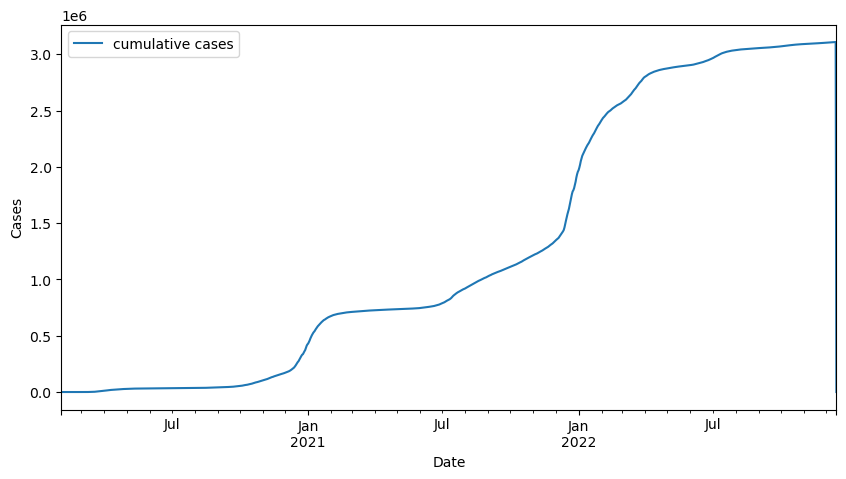

In [607]:
# 2. Plot the visualise the transformed data
plt.figure()
df1.plot(x='date', y = 'cumulative cases',figsize=(10,5), xlabel='Date', ylabel='Cases')
plt.show()

In [608]:
# 3. Answer the question posed with markdown or comment

# the plot shows that during the period Jan 2021 and July 2021 cases plateaued
# there wasn't much change in the cumulative cases during that period. Similar
# can be said about the period of July 2022 to current.

### Task 16

In [676]:
# 1. Aggregate the data as an intemediate dataframe

df2 = covid_data[['date','cumulative cases']]
df2 = df2.groupby('date')['cumulative cases'].sum()
df2

date
2020-01-30           1.0
2020-01-31           1.0
2020-02-01           1.0
2020-02-02           2.0
2020-02-03          15.0
                 ...    
2022-12-11    21045521.0
2022-12-12    21051321.0
2022-12-13    21056922.0
2022-12-14    21060303.0
2022-12-15      244135.0
Name: cumulative cases, Length: 1051, dtype: float64

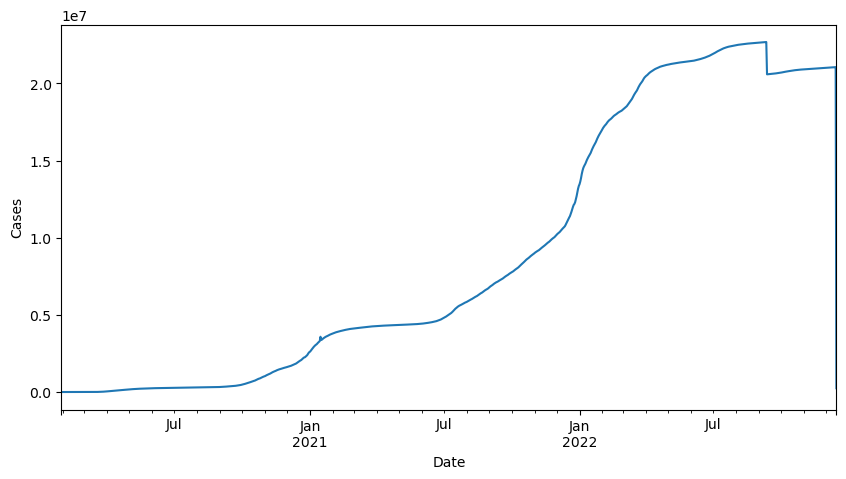

In [677]:
# 2. Plot the visualise the transformed data
plt.clf()
df2.plot(x='date', y = 'cumulative cases',figsize=(10,5), xlabel='Date', ylabel='Cases')
plt.show()

In [568]:
# 3. Answer the question posed with markdown or comment

# The pattern seen in London is similar to country-wide just at a more higher level

### Task 17

area
East Midlands               AxesSubplot(0.125,0.2;0.775x0.68)
East of England             AxesSubplot(0.125,0.2;0.775x0.68)
London                      AxesSubplot(0.125,0.2;0.775x0.68)
North East                  AxesSubplot(0.125,0.2;0.775x0.68)
North West                  AxesSubplot(0.125,0.2;0.775x0.68)
Scotland                    AxesSubplot(0.125,0.2;0.775x0.68)
South East                  AxesSubplot(0.125,0.2;0.775x0.68)
South West                  AxesSubplot(0.125,0.2;0.775x0.68)
Wales                       AxesSubplot(0.125,0.2;0.775x0.68)
West Midlands               AxesSubplot(0.125,0.2;0.775x0.68)
Yorkshire and The Humber    AxesSubplot(0.125,0.2;0.775x0.68)
Name: cumulative cases, dtype: object

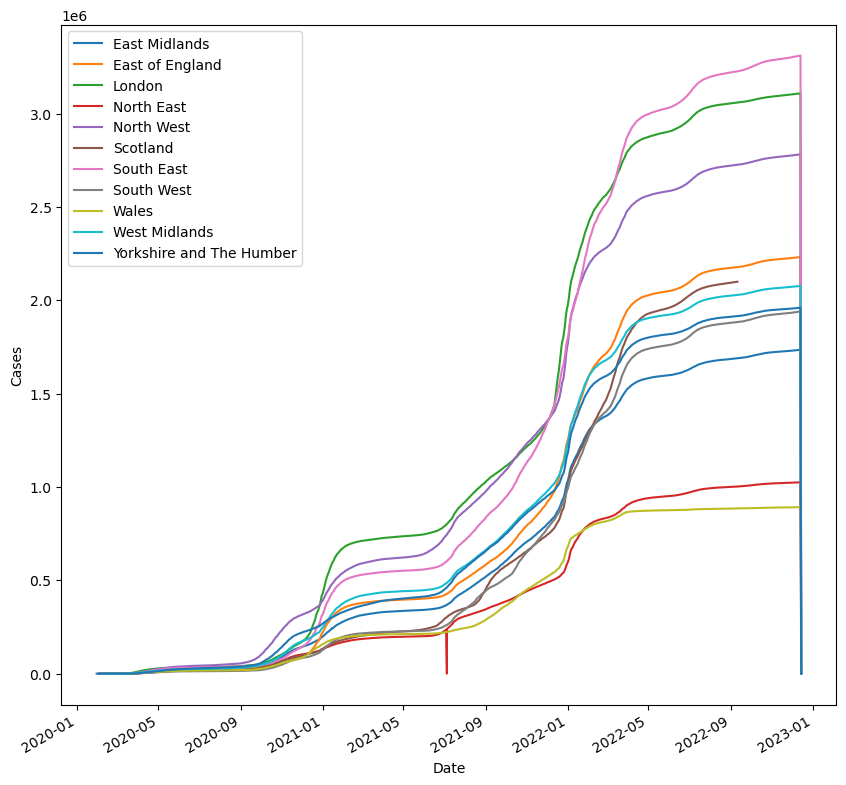

In [678]:
# 1. Aggregate the data as an intemediate dataframe
df3 = covid_data[['date', 'area','cumulative cases']]

# 2. Plot the visualise the transformed data
plt.clf()
df3.set_index('date', inplace=True)
df3.groupby('area')['cumulative cases'].plot(xlabel='Date', ylabel='Cases', figsize=(10,10),legend=True)


In [570]:
# 3. Answer the question posed with markdown or comment

# All the nations show a similar pattern. With a spiking rise in January 2021
# then leading to a plateau before spiking up from September 2021 all the way
# to around May 2022

### Task 18

In [420]:
# 3. Answer the question posed with markdown or comment

# The cases spiked after June July, drastically, this could have been a 
# result of easing of lockdown and testing restriction, allowing freedom of 
# movement and gathering leading to a rise in covid cases

### Task 19

In [679]:
# 1. Aggregate the data as an intemediate dataframe

df4 = covid_data.loc[covid_data['area'] == 'London']
df4 = df4[['date','cumulative deaths']]
df4

,date,cumulative deaths
9657,2022-12-15,21934.0
9658,2022-12-14,21869.0
9659,2022-12-13,21869.0
9660,2022-12-12,21869.0
9661,2022-12-11,21869.0
...,...,...
10699,2020-02-07,6161.0
10700,2020-02-06,6161.0
10701,2020-02-05,6161.0
10702,2020-02-04,6161.0


<Figure size 640x480 with 0 Axes>

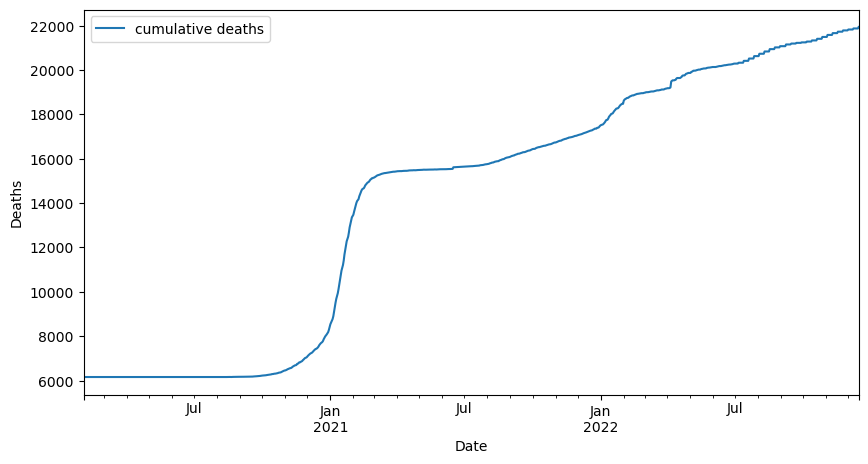

In [680]:
# 2. Plot the visualise the transformed data
plt.figure()
plt.clf()
df4.plot(x='date', y = 'cumulative deaths',figsize=(10,5), xlabel='Date', ylabel='Deaths')
plt.show()

In [ ]:
# 3. Answer the question posed with markdown or comment

# The deaths trend climbed in January 2021 as the rate of deaths greatly increased
# The ongoing trend broke after July 2021 when the expected steep rise was avoided
# and there was a slowed increase in deaths

### Task 20

In [614]:
# 3. Answer the question posed with markdown or comment

# The trend for cumulative cases and deaths are quite similar with similar number
# of peaks and plateaus. Deaths have had a more steep increase comparatively

### Task 21

In [730]:
# 1. Aggregate the data as an intemediate dataframe
covid_data['cumulative_deaths_per_cases']= covid_data['cumulative deaths']/covid_data['cumulative cases']
df5 = covid_data[['date','cumulative deaths','cumulative cases']]
df5 = df5.groupby('date')[['cumulative deaths','cumulative cases']].sum()

df5['cumulative_deaths_per_cases'] = df5['cumulative deaths']/df5['cumulative cases']


<AxesSubplot:xlabel='date'>

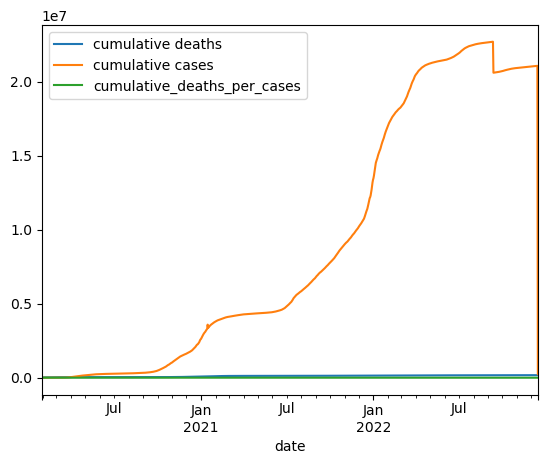

In [731]:
# 2. Plot the visualise the transformed data

df5.plot()

In [ ]:
# 3. Answer the question posed with markdown or comment

# There seemed to be a very high rise at the start of January 2020

### Task 22

### Task 23

In [461]:
# 1. Aggregate the data as an intemediate dataframe

df6 = covid_data[['date','cumulative vaccinated']]
df6 = df6.groupby('date')['cumulative vaccinated'].sum()
df6

date
2020-01-30        1040.0
2020-01-31        1040.0
2020-02-01        1040.0
2020-02-02        2080.0
2020-02-03        6329.0
                 ...    
2022-12-10    41647029.0
2022-12-11    41647416.0
2022-12-12    41647796.0
2022-12-13    41648275.0
2022-12-14    41648768.0
Name: cumulative vaccinated, Length: 1050, dtype: float64

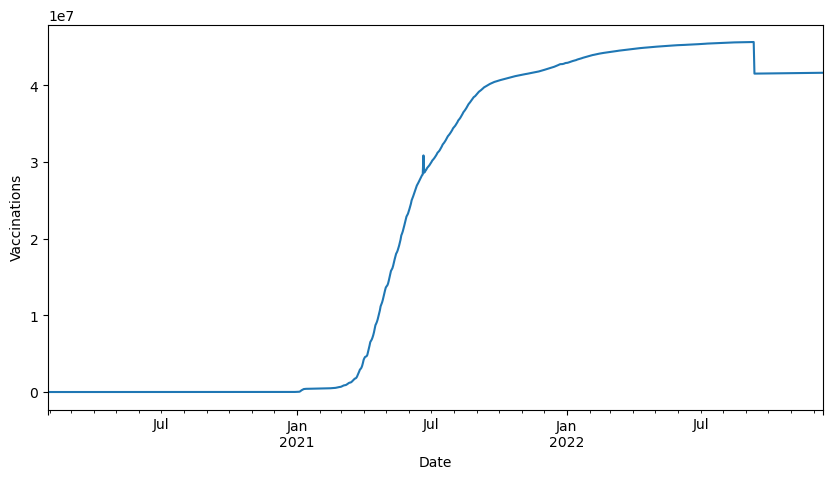

In [490]:
# 2. Plot the visualise the transformed data
plt.figure()
plt.clf()
df6.plot(x='date', y = 'cumulative vaccinated',figsize=(10,5), xlabel='Date', ylabel='Vaccinations')
plt.show()

In [ ]:
# 3. Answer the question posed with markdown or comment


### Task 24

area
East Midlands               AxesSubplot(0.125,0.2;0.775x0.68)
East of England             AxesSubplot(0.125,0.2;0.775x0.68)
London                      AxesSubplot(0.125,0.2;0.775x0.68)
North East                  AxesSubplot(0.125,0.2;0.775x0.68)
North West                  AxesSubplot(0.125,0.2;0.775x0.68)
Scotland                    AxesSubplot(0.125,0.2;0.775x0.68)
South East                  AxesSubplot(0.125,0.2;0.775x0.68)
South West                  AxesSubplot(0.125,0.2;0.775x0.68)
Wales                       AxesSubplot(0.125,0.2;0.775x0.68)
West Midlands               AxesSubplot(0.125,0.2;0.775x0.68)
Yorkshire and The Humber    AxesSubplot(0.125,0.2;0.775x0.68)
Name: daily cases roll avg, dtype: object

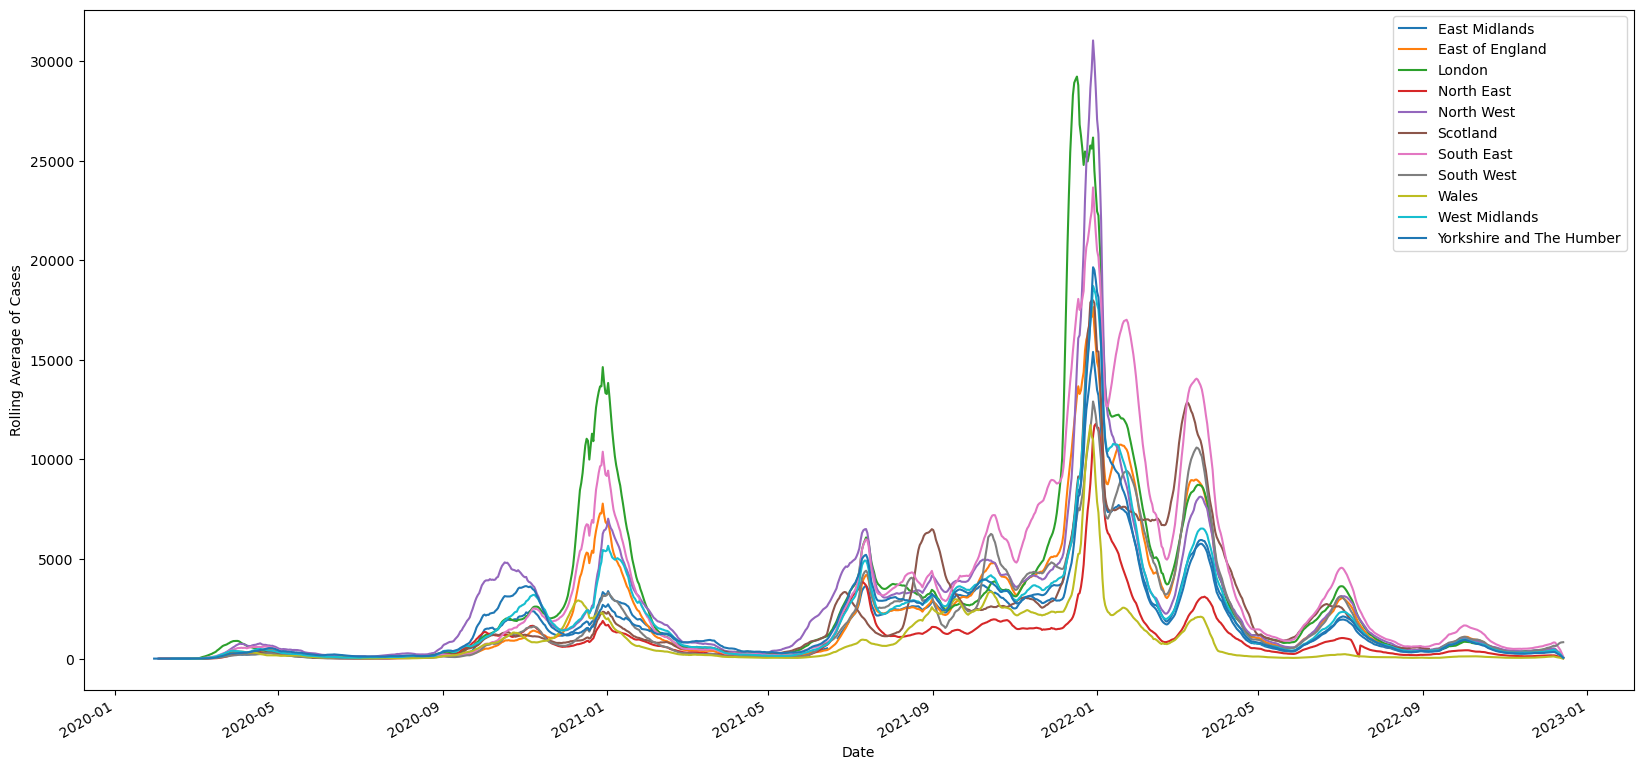

In [493]:
# 1. Aggregate the data as an intemediate dataframe
df7 = covid_data[['date', 'area','daily cases roll avg']]

# 2. Plot the visualise the transformed data
plt.clf()
df7.set_index('date', inplace=True)
df7.groupby('area')['daily cases roll avg'].plot(xlabel='Date', ylabel='Rolling Average of Cases', figsize=(20,10),legend=True)


In [ ]:
# 3. Answer the question posed with markdown or comment

# There doesn't seem to be a specific region that is escaping the general trend
# apart from London which has a more exxagerated trend as compared to others

### Task 25

area
London                      AxesSubplot(0.125,0.11;0.775x0.77)
Yorkshire and The Humber    AxesSubplot(0.125,0.11;0.775x0.77)
Name: daily cases roll avg, dtype: object

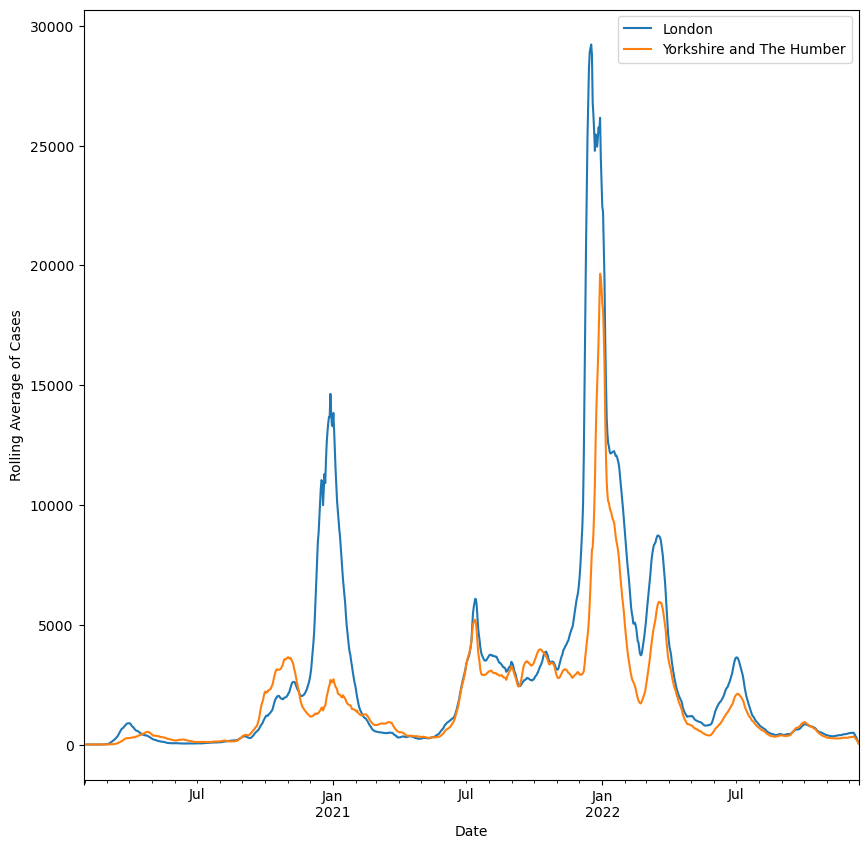

In [488]:
# 1. Aggregate the data as an intemediate dataframe

df8 = covid_data.loc[((covid_data['area'] == 'Yorkshire and The Humber') | (covid_data['area'] == 'London'))]
df8 = df8[['date','area','daily cases roll avg']]
df8
# 2. Plot the visualise the transformed data
plt.clf()
df8.set_index('date', inplace=True)
df8.groupby('area')['daily cases roll avg'].plot(xlabel='Date', ylabel='Rolling Average of Cases', figsize=(10,10),legend=True)


In [494]:
# 3. Answer the question posed with markdown or comment

# The difference can be due to the fact that the city of London is the biggest city
# and far more dense than the other region leading to a higher rolling average of cases
# as compared to say Yorkshire and The Humber.

### Task26

In [716]:
# 1. Aggregate the data as an intemediate dataframe

daily_case_max = covid_data['daily cases roll avg'].max()
daily_deaths_max = covid_data['daily deaths roll avg'].max()
covid_data['daily_cases_rolling_avg_norm'] = covid_data['daily cases roll avg'].div(daily_case_max)
covid_data['daily_deaths_rolling_avg_norm'] = covid_data['daily deaths roll avg'].div(daily_deaths_max)
df9 = covid_data[['date', 'daily_deaths_rolling_avg_norm','daily_cases_rolling_avg_norm']]

<AxesSubplot:xlabel='date'>

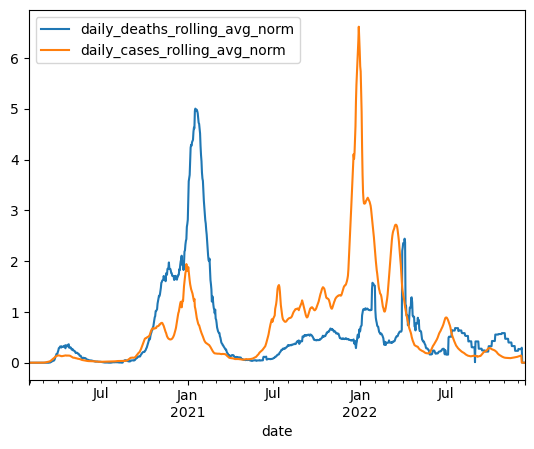

In [722]:
# 2. Plot the visualise the transformed data
df9 = df9.groupby('date')[['daily_deaths_rolling_avg_norm','daily_cases_rolling_avg_norm']].sum()
df9.plot()


In [732]:
# 3. Answer the question posed with markdown or comment

# the daily trends seem to be increasing and decreasing at the similar rates
# around after january 2022 and before january 2021

### Task 27

In [748]:
# 1. Aggregate the data as an intemediate dataframe

scotland_covid_vac = covid_data_vaccinations_wide.loc[covid_data_vaccinations_wide['area'] == 'Scotland']
london_covid_vac = covid_data_vaccinations_wide.loc[covid_data_vaccinations_wide['area'] == 'London']
london_covid_vac = london_covid_vac[['date', 'age','cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']]
pivot = pd.pivot_table(data=london_covid_vac, index=['date'], columns=['age'],values=['cumVaccinationFirstDoseUptakeByVaccinationDatePercentage'])

pivot

cumVaccinationFirstDoseUptakeByVaccinationDatePercentage        \
age                                                           05_11 12_15   
date                                                                        
2020-12-08                                                0.0         0.0   
2020-12-09                                                0.0         0.0   
2020-12-10                                                0.0         0.0   
2020-12-11                                                0.0         0.0   
2020-12-12                                                0.0         0.0   
...                                                       ...         ...   
2022-12-10                                                9.2        37.9   
2022-12-11                                                9.2        37.9   
2022-12-12                                                9.2        37.9   
2022-12-13                                                9.2        37.9   
2022-12-14                                                9.2        37.9   

                                                                             \
age        16_17 18_24 25_29 30_34 35_39 40_44 45_49  50+ 50_54 55_59 60_64   
date                                                                          
2020-12-08   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   
2020-12-09   0.0   0.0   0.0   0.0   0.0   0.0   0.0  NaN   0.0   0.0   0.0   
2020-12-10   0.0   0.0   0.0   0.0   0.0   0.0   0.1  NaN   0.1   0.1   0.1   
2020-12-11   0.0   0.0   0.1   0.1   0.1   0.0   0.1  NaN   0.1   0.1   0.1   
2020-12-12   0.0   0.0   0.1   0.1   0.1   0.0   0.1  NaN   0.1   0.1   0.1   
...          ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   
2022-12-10  49.7  60.3  64.2  62.6  63.1  67.1  72.6  NaN  77.5  80.7  83.3   
2022-12-11  49.7  60.3  64.2  62.6  63.1  67.1  72.6  NaN  77.5  80.7  83.3   
2022-12-12  49.7  60.3  64.2  62.6  63.1  67.1  72.6  NaN  77.5  80.7  83.3   
2022-12-13  49.7  60.3  64.2  62.6  63.1  67.1  72.6  NaN  77.5  80.7  83.3   
2022-12-14  49.7  60.3  64.2  62.6  63.1  67.1  72.6  NaN  77.5  80.7  83.3   

                                                     
age        65_69 70_74  75+ 75_79 80_84 85_89   90+  
date                                                 
2020-12-08   0.0   0.0  0.0   0.0   0.1   0.1   0.1  
2020-12-09   0.1   0.0  NaN   0.0   0.1   0.2   0.2  
2020-12-10   0.1   0.0  NaN   0.0   0.2   0.4   0.3  
2020-12-11   0.1   0.1  NaN   0.1   0.4   0.6   0.4  
2020-12-12   0.1   0.1  NaN   0.1   0.5   0.8   0.6  
...          ...   ...  ...   ...   ...   ...   ...  
2022-12-10  85.4  87.8  NaN  90.2  90.1  90.2  88.9  
2022-12-11  85.4  87.8  NaN  90.2  90.1  90.2  88.9  
2022-12-12  85.4  87.8  NaN  90.2  90.1  90.2  88.9  
2022-12-13  85.4  87.8  NaN  90.2  90.1  90.2  88.9  
2022-12-14  85.4  87.8  NaN  90.2  90.1  90.2  88.9  

[737 rows x 20 columns]

<AxesSubplot:xlabel='date'>

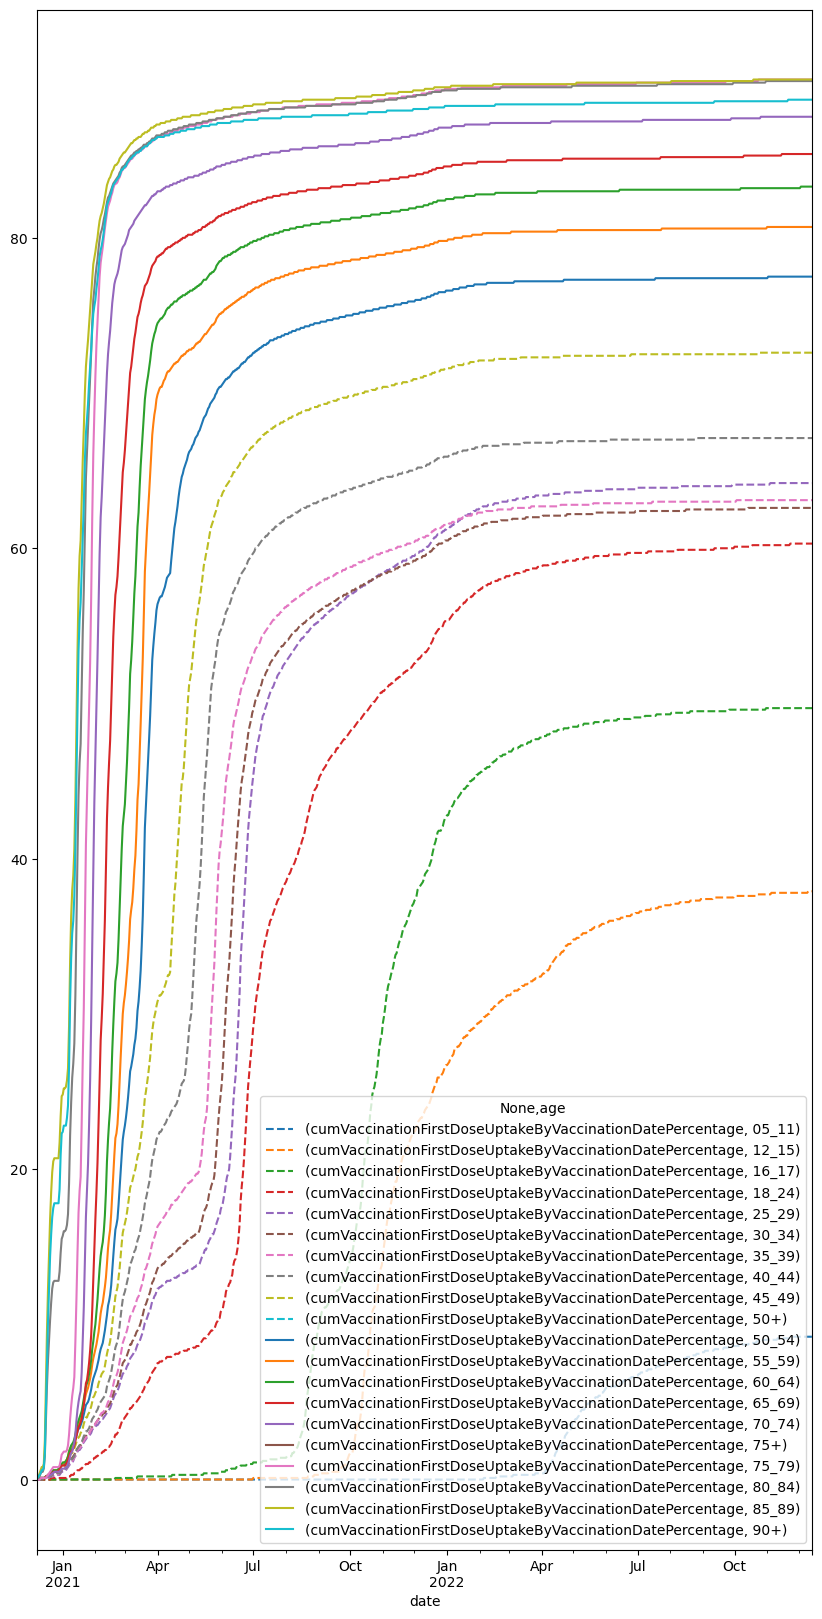

In [757]:
# 2. Plot the visualise the transformed data

pivot.plot(figsize=(10,20), style=['--' for _ in range(10)])

In [758]:
# 3. Answer the question posed with markdown or comment

# All age groups were not vaccinated at the same time, the plot shows that
# age groups above 50 were targetted first for vaccinations ie solid lines
# this shouws that the more threatened were vaccinated followed by middle age professional
# more than likely part of essential personnel

### Task 28

In [759]:
# 1. Aggregate the data as an intemediate dataframe
scotland_covid_vac = scotland_covid_vac[['date', 'age','cumVaccinationFirstDoseUptakeByVaccinationDatePercentage']]
S_pivot = pd.pivot_table(data=scotland_covid_vac, index=['date'], columns=['age'],values=['cumVaccinationFirstDoseUptakeByVaccinationDatePercentage'])

S_pivot

cumVaccinationFirstDoseUptakeByVaccinationDatePercentage        \
age                                                           05_11 12_15   
date                                                                        
2020-12-08                                                0.0         0.0   
2020-12-09                                                0.0         0.0   
2020-12-10                                                0.0         0.0   
2020-12-11                                                0.0         0.0   
2020-12-12                                                0.0         0.0   
...                                                       ...         ...   
2022-09-07                                               22.8        66.0   
2022-09-08                                               22.8        66.0   
2022-09-09                                               22.8        66.0   
2022-09-10                                               22.8        66.0   
2022-09-11                                               22.8        66.0   

                                                                           \
age        16_17 18_29 30_39 40_49 50_54 55_59  60_64  65_69 70_74  75_79   
date                                                                        
2020-12-08   0.0   0.0   0.1   0.1   0.1   0.1    0.1    0.0   0.0    0.0   
2020-12-09   0.0   0.1   0.2   0.2   0.2   0.2    0.2    0.1   0.0    0.0   
2020-12-10   0.0   0.1   0.3   0.4   0.4   0.4    0.3    0.1   0.0    0.0   
2020-12-11   0.0   0.2   0.4   0.5   0.6   0.6    0.5    0.2   0.0    0.0   
2020-12-12   0.0   0.3   0.5   0.6   0.7   0.7    0.5    0.2   0.0    0.0   
...          ...   ...   ...   ...   ...   ...    ...    ...   ...    ...   
2022-09-07  80.3  77.2  84.7  90.7  93.7  98.1  100.0  100.0  95.2  100.0   
2022-09-08  80.3  77.2  84.7  90.7  93.7  98.1  100.0  100.0  95.2  100.0   
2022-09-09  80.3  77.2  84.7  90.7  93.7  98.1  100.0  100.0  95.2  100.0   
2022-09-10  80.3  77.2  84.7  90.7  93.7  98.1  100.0  100.0  95.2  100.0   
2022-09-11  80.3  77.2  84.7  90.7  93.7  98.1  100.0  100.0  95.2  100.0   

                  
age          80+  
date              
2020-12-08   0.0  
2020-12-09   0.0  
2020-12-10   0.0  
2020-12-11   0.0  
2020-12-12   0.0  
...          ...  
2022-09-07  98.5  
2022-09-08  98.5  
2022-09-09  98.5  
2022-09-10  98.5  
2022-09-11  98.5  

[643 rows x 13 columns]

<AxesSubplot:xlabel='date'>

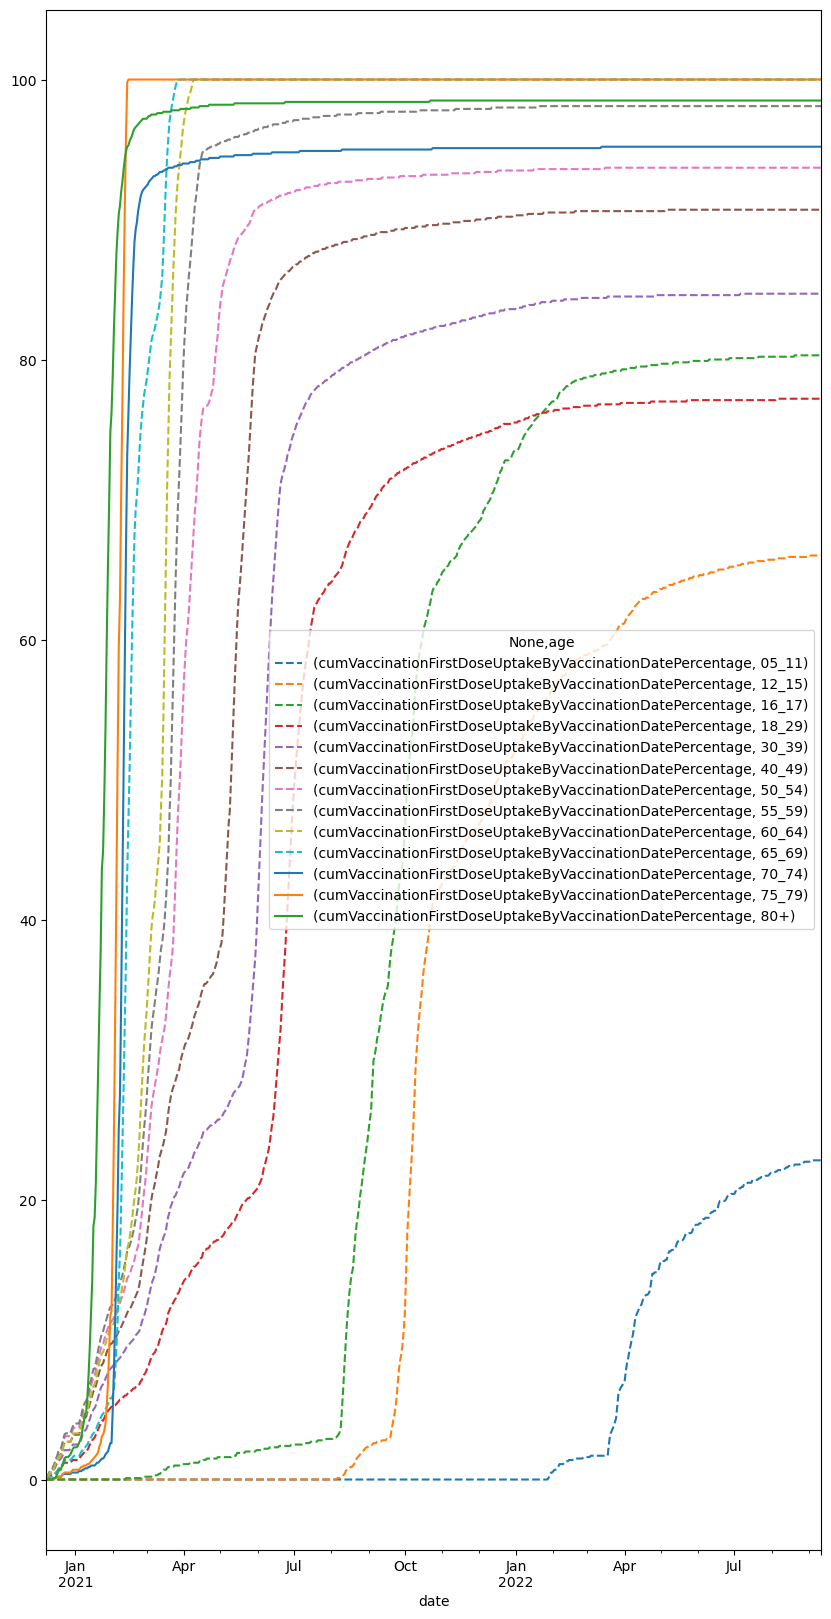

In [761]:
# 2. Plot the visualise the transformed data

S_pivot.plot(figsize=(10,20), style=['--' for _ in range(10)])

In [ ]:
# 3. Answer the question posed with markdown or comment

# The plots follow a similar trend however the scotland plot shows that the vaccines were 
# rolled out in a more general manner. The 50-64 section and 65-79 were some of the earliest to
# recieve the first dosage of the vaccine in Scotland siilar to that of London which shows a similar
# strategy used where the more vulnerable were vaccinated first